In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Load the dataset

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/nearest-earth-objects(1910-2024).csv")
df.head(5)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


Display basic info and first few rows

In [40]:
print(df.info())
print(df.head())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB
None
    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.

Handling missing values

In [48]:
df.dropna(inplace=True)

EDA - Plot hazardous vs non-hazardous

<ipython-input-42-d61d18d06cf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["is_hazardous"], palette=["red", "blue"])


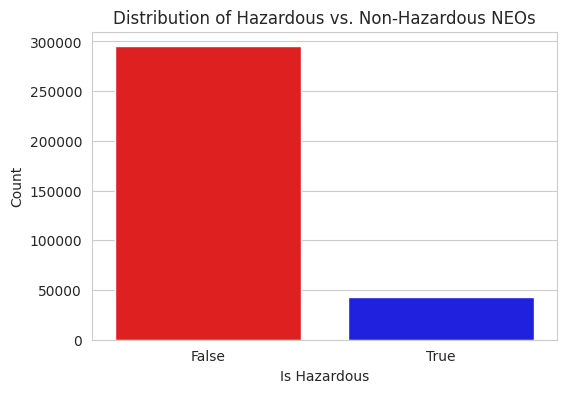

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x=df["is_hazardous"], palette=["red", "blue"])
plt.title("Distribution of Hazardous vs. Non-Hazardous NEOs")
plt.xlabel("Is Hazardous")
plt.ylabel("Count")
plt.show()

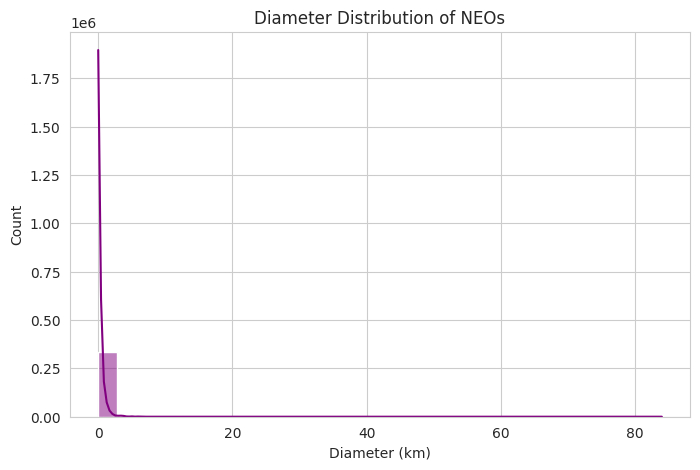

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df["estimated_diameter_max"], bins=30, kde=True, color="purple")
plt.title("Diameter Distribution of NEOs")
plt.xlabel("Diameter (km)")
plt.ylabel("Count")
plt.show()

Feature Engineering

In [59]:
label_encoders = {}

for col in df.select_dtypes(include=["object"]).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop(columns=["is_hazardous"])
y = df["is_hazardous"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(df.head())
print(y_train_resampled.value_counts())

    neo_id   name  absolute_magnitude  estimated_diameter_min  \
0  2162117  30600               19.14                0.394962   
1  2349507  31392               18.50                0.530341   
2  2455415  32115               21.45                0.136319   
3  3132126    736               20.63                0.198863   
4  3557844   4877               22.70                0.076658   

   estimated_diameter_max  orbiting_body  relative_velocity  miss_distance  \
0                0.883161              0       71745.401048   5.814362e+07   
1                1.185878              0      109949.757148   5.580105e+07   
2                0.304818              0       24865.506798   6.720689e+07   
3                0.444672              0       78890.076805   3.039644e+07   
4                0.171412              0       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         False  
3         False  
4         False  
is_hazardous
True     235921
Fal

Random Forest

In [64]:
model = LogisticRegression(max_iter=500, solver='liblinear', random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.5970725216234198
Precision: 0.2042687747035573
Recall: 0.7558207558207558
F1 Score: 0.32161704669919344
AUC-ROC: 0.6649652790747429
